In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder
from lime import lime_tabular
from sklearn.model_selection import train_test_split

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import *
from sklearn.impute import *
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import *
from deap import base, creator, tools, algorithms
from datetime import datetime
from sklearn.svm import SVC
import warnings
import numpy as np
import random

In [21]:
df = pd.read_csv("arrhythmia.csv", header=None).replace("?", np.nan)
data = df.to_numpy()
x, y = data[:, :-1], data[:, -1]
y = pd.Series(y).apply(str)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
values = df.iloc[:, -1].values

# Calcula as estatísticas
print("Máximo =", np.max(values),
  "Mínimo =", np.min(values),
  "Média =", np.mean(values),
  "Mediana =", np.median(values),
  "Desvio Padrão =", np.std(values))

Máximo = 16 Mínimo = 1 Média = 3.8805309734513274 Mediana = 1.0 Desvio Padrão = 4.402219038329423


In [22]:
x_train

array([[57, 1, 153, ..., 2.8, 20.8, 49.3],
       [36, 0, 170, ..., 1.7, 15.4, 30.0],
       [76, 1, 150, ..., 1.1, 26.5, 43.0],
       ...,
       [68, 1, 168, ..., 2.6, 6.2, 31.1],
       [39, 1, 160, ..., 1.9, 8.2, 22.2],
       [67, 1, 165, ..., 1.6, 40.8, 50.7]], dtype=object)

In [23]:
encoder = OneHotEncoder()
encoder.fit(x_train)
encoded_train = encoder.transform(x_train)
rf = RandomForestClassifier()
rf.fit(encoded_train, y_train)

encoded_train

<361x13547 sparse matrix of type '<class 'numpy.float64'>'
	with 100719 stored elements in Compressed Sparse Row format>

In [24]:
df = pd.read_csv("resultados_KNN_4.csv")
df.head(5)

,strategy,k,n_neighbors,weights,algorithm,leaf_size,f1,elapsed_time
0,most_frequent,203,10,uniform,brute,45,0.377357,0.102266
1,most_frequent,113,3,distance,ball_tree,19,0.470235,0.091076
2,most_frequent,83,12,NaN,auto,26,0.379921,0.124078
3,most_frequent,8,8,NaN,auto,33,0.387541,0.131108
4,mean,128,2,NaN,ball_tree,45,0.417047,0.065474


In [25]:
maior_valor = df['f1'].max()
maior_valor

0.4873849152796521

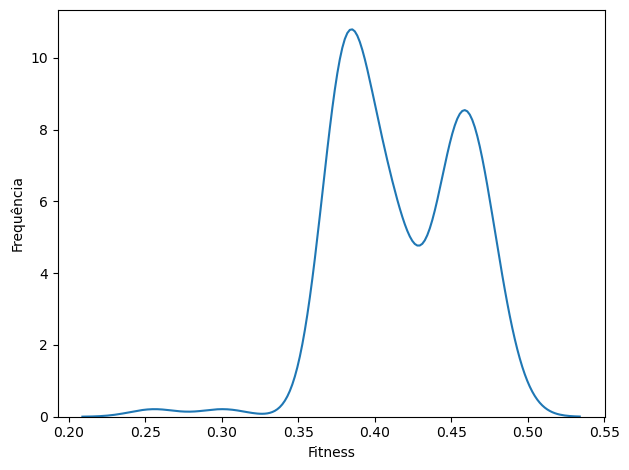

In [26]:
fig, ax = plt.subplots()
sns.kdeplot(df, x="f1", ax=ax)
ax.set_ylabel("Frequência")
ax.set_xlabel("Fitness")
fig.tight_layout()

<Axes: xlabel='elapsed_time', ylabel='Density'>

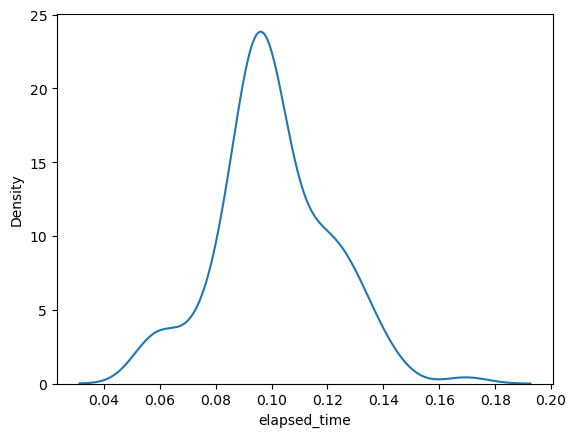

In [27]:
sns.kdeplot(df, x="elapsed_time")

C:\Users\maria\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


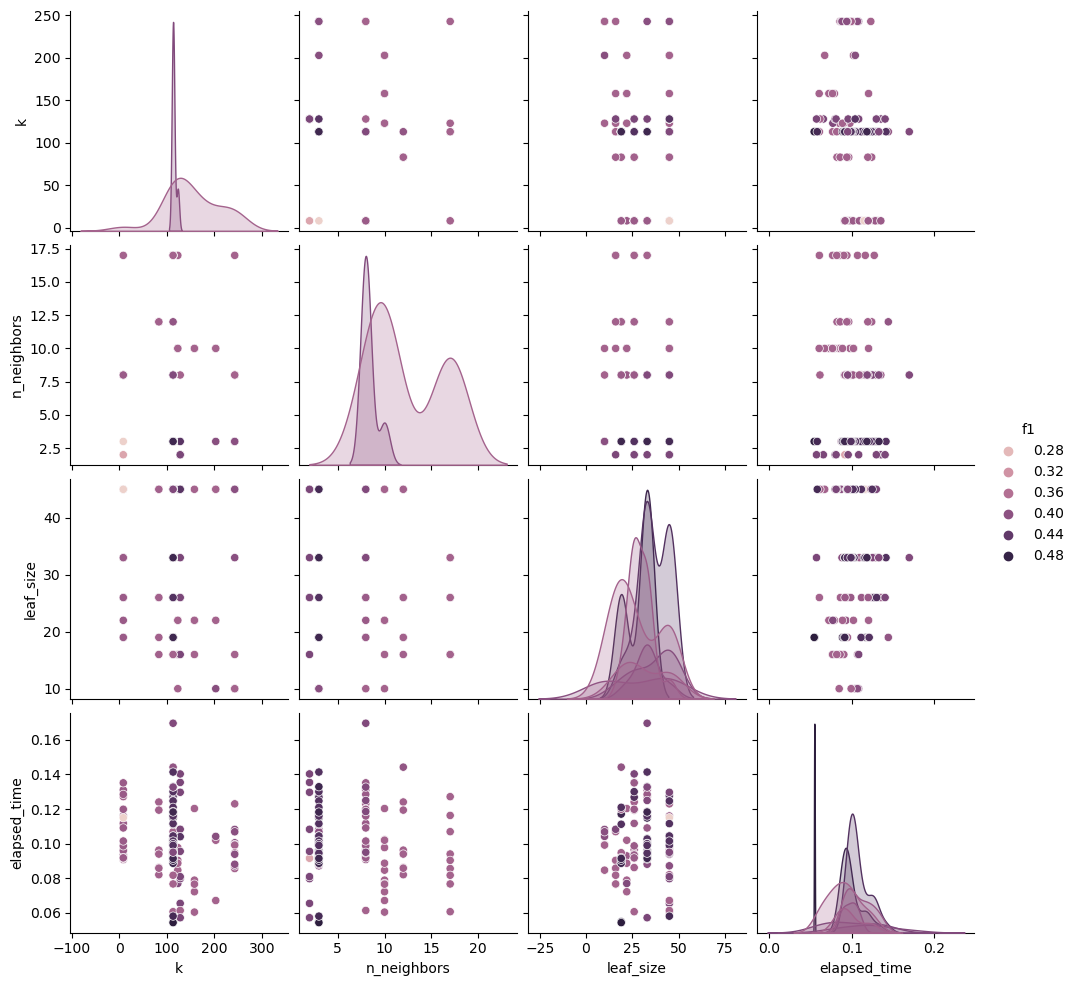

In [28]:
#df.f1.value_counts()

sns.pairplot( df, hue="f1" )

In [29]:
X = df.to_numpy()[:, :-2]
y = df["f1"].astype(float)

df.head(5)

,strategy,k,n_neighbors,weights,algorithm,leaf_size,f1,elapsed_time
0,most_frequent,203,10,uniform,brute,45,0.377357,0.102266
1,most_frequent,113,3,distance,ball_tree,19,0.470235,0.091076
2,most_frequent,83,12,NaN,auto,26,0.379921,0.124078
3,most_frequent,8,8,NaN,auto,33,0.387541,0.131108
4,mean,128,2,NaN,ball_tree,45,0.417047,0.065474


In [30]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X)
X_encoded = enc.transform(X).toarray()

X_encoded

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [31]:
#t-SNE
x_embedded = TSNE(n_components=2).fit_transform(X_encoded)

x_embedded[:10]

array([[-4.906144  , 12.532622  ],
       [-1.5112891 , -8.130216  ],
       [ 4.0185614 ,  6.8986998 ],
       [ 5.948334  , -0.47624096],
       [-1.17794   ,  5.3484664 ],
       [ 3.420934  ,  2.2677107 ],
       [-2.369881  , 12.228194  ],
       [ 1.2848433 , 10.560148  ],
       [-2.8659363 ,  8.050511  ],
       [-8.016167  ,  6.3015046 ]], dtype=float32)

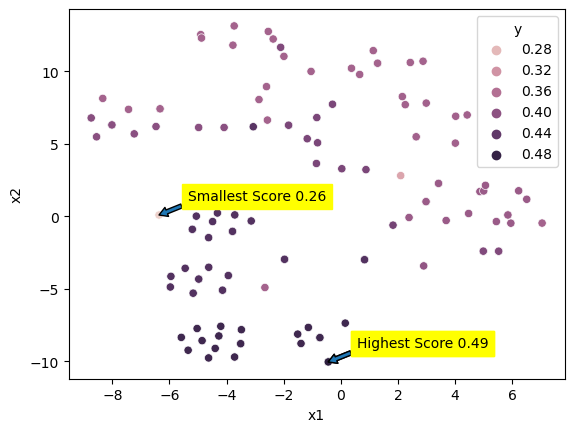

In [32]:
x_embedded_f1 = np.column_stack((x_embedded, df['f1']))
_df = pd.DataFrame(data=x_embedded_f1, columns=["x1", "x2", "y"])
_df.head(5)
ax = sns.scatterplot(data=_df, x="x1", y="x2", hue="y")

# plot highest fitness
coord = _df.loc[_df["y"] == _df["y"].max()]
for i, row in coord.iterrows():
    x, y = row["x1"], row["x2"]
    ax.annotate(f"Highest Score {row['y']:>.2f}", (x, y), (x+1, y+1), arrowprops={"width": 3, "headwidth": 7, "headlength": 6}, backgroundcolor="yellow")

# plot lowest fitness
coord = _df.loc[_df["y"] == _df["y"].min()]
for i, row in coord.iterrows():
    x, y = row["x1"], row["x2"]
    ax.annotate(f"Smallest Score {row['y']:>.2f}", (x, y), (x+1, y+1), arrowprops={"width": 3, "headwidth": 7, "headlength": 6}, backgroundcolor="yellow")

In [33]:
df.loc[df.f1 == df.f1.max()]

,strategy,k,n_neighbors,weights,algorithm,leaf_size,f1,elapsed_time
73,mean,113,3,distance,ball_tree,19,0.487385,0.054883
102,mean,113,3,distance,ball_tree,19,0.487385,0.054347


In [34]:
# Exibe os resultados
print("Média da coluna 'f1':", df['f1'].mean())
print("Média da coluna 'elapsed_time':", df['elapsed_time'].mean())

Média da coluna 'f1': 0.416858358715993
Média da coluna 'elapsed_time': 0.10069690322580645


In [35]:
df_X = pd.read_csv("arrhythmia.csv", header=None).replace("?", np.nan)
df_X.shape

(452, 280)

In [ ]:
# Usei esse site como exemplo: https://marcotcr.github.io/lime/tutorials/Tutorial%20-%20continuous%20and%20categorical%20features.html
RANDOM_STATE = 42

df_X = pd.read_csv("arrhythmia.csv", names=list(map(lambda X: f"col_{X}", range(280)))).replace("?", np.nan)
data = df_X.to_numpy()
X, y = data[:, :-1], data[:, -1]
X = X.astype(float)
y = pd.Series(y).astype(float)

preprocess = Pipeline([
        ('imputer', SimpleImputer(strategy="mean"))])

pipeline = pipe = Pipeline([
        ('imputer', SimpleImputer(strategy="mean")),
        ('scaler', StandardScaler()),
        ('feature-selection', SelectKBest(k=113)),
        ('knn', KNeighborsClassifier(
            n_neighbors=3,
            weights="distance",
            algorithm="ball_tree",
            leaf_size=19))])

pipeline.fit(X, y)
X = preprocess.fit_transform(X, y)
class_ = pipeline.classes_
y_pred = pipeline.predict(X)

explainer = LimeTabularExplainer(X,
                                 feature_names=df_X.columns[:-1],
                                 class_names=class_)

for i, (y, yp) in enumerate(zip(y, y_pred)):
    if y == yp:
        print(f"classe real: {y}, predição: {yp}")
        exp = explainer.explain_instance(X[i], pipeline.predict_proba)
        exp.show_in_notebook(show_table=True, show_all=False)

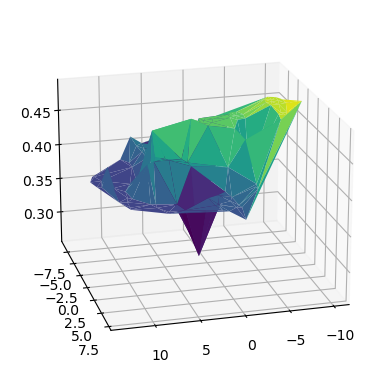

In [36]:
#cria uma imagem 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

X = x_embedded_f1[:, 0]
Y = x_embedded_f1[:, 1]
Z = x_embedded_f1[:, 2]

#Arredondar os valores de X, Y e Z
X = np.round(X, 2)
Y = np.round(Y, 2)
Z = np.round(Z, 2)

ax.plot_trisurf(Y, X, Z, cmap='viridis', linewidth=0.2)
ax.view_init(20, 75)

plt.show()

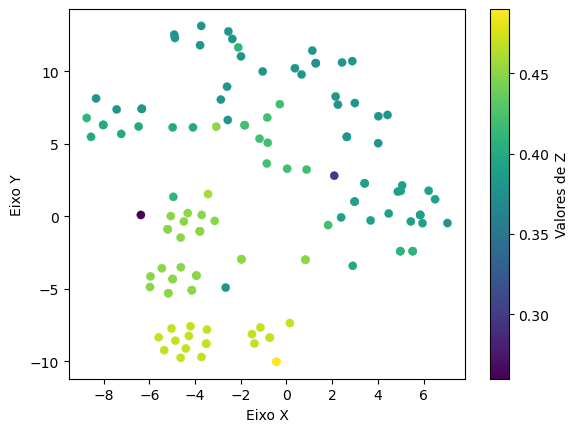

In [37]:
#cria uma imagem 2D que mostre o Z evidente
fig = plt.figure()
ax = fig.add_subplot()

X = x_embedded_f1[:, 0]
Y = x_embedded_f1[:, 1]
Z = x_embedded_f1[:, 2]

#Arredondar os valores de X, Y e Z
X = np.round(X, 2)
Y = np.round(Y, 2)
Z = np.round(Z, 2)

scatter = ax.scatter(X, Y, c=Z, cmap='viridis', linewidth=0.2)

#Definir os rótulos dos eixos
ax.set_xlabel('Eixo X')
ax.set_ylabel('Eixo Y')

# Adicione uma barra de cores
cbar = plt.colorbar(scatter)
cbar.set_label('Valores de Z')

plt.show()